In [1]:
import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

import seaborn as sns

import pylab as plot

from scipy import stats

In [2]:
data = pd.read_csv(r"C:\Users\johnl\Documents\heart\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Information about features
- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)

# 1. Exploratory Data Analysis (EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.
- What question(s) are you trying to solve?
- What kind of data do we have and how do we treat different types?
- What's missing from the data and how do you deal with it?
- Where are the outliers and why should you care about them?
- How can you add, change or remove features to get more out of your data?

In [132]:
categorical_val = []
continous_val = []
for column in data.columns:
    #print('==============================')
    #print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [4]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

AxesSubplot(0.547727,0.125;0.352273x0.755)


Text(0.5, 1.0, 'Heart Disease')

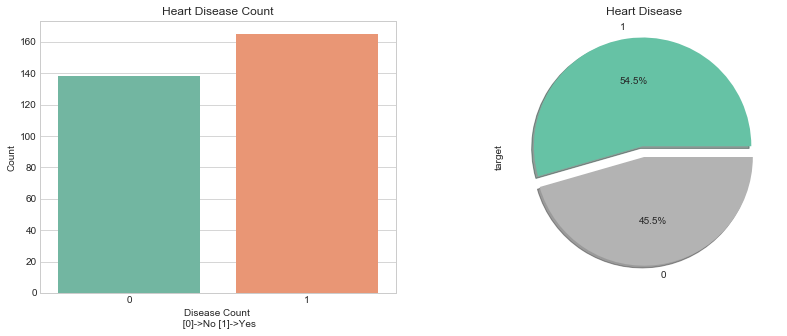

In [5]:
fig,ax=plt.subplots(1, 2, figsize = (14,5))
print(ax[1])
sns.countplot(data=data, x='target', ax=ax[0],palette='Set2')
ax[0].set_xlabel("Disease Count \n [0]->No [1]->Yes")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
data['target'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap = "Set2")
plt.title("Heart Disease")


In [6]:
# nodisease - len of data where data.target equals 0 
NoDisease = len(data[data.target == 0])
HaveDisease = len(data[data.target ==1])



### Observation of Target
165 people in our data set have heart disease <br>
138 people do not have heart disease <br>
Thus our data is approx balanced

## Exploring catagory features

### 1. Sex of Patient

Text(0.5, 1.0, '0 ->Female , 1 -> Male')

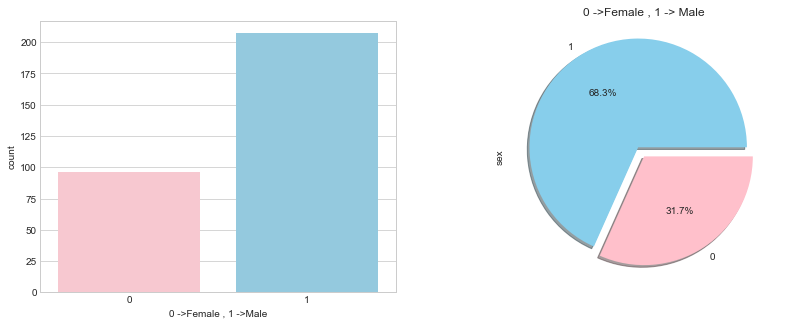

In [13]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=data,palette=['pink', 'skyblue'],ax=ax[0])
ax[0].set_xlabel("0 ->Female , 1 ->Male")

data.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0],colors=['skyblue','pink'] )
ax[1].set_title("0 ->Female , 1 -> Male")


In [14]:
countFemale = len(data[data.sex == 0])
print(countFemale)
countMale = len(data[data.sex == 1])
print(countMale)
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

96
207
Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [15]:
data.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

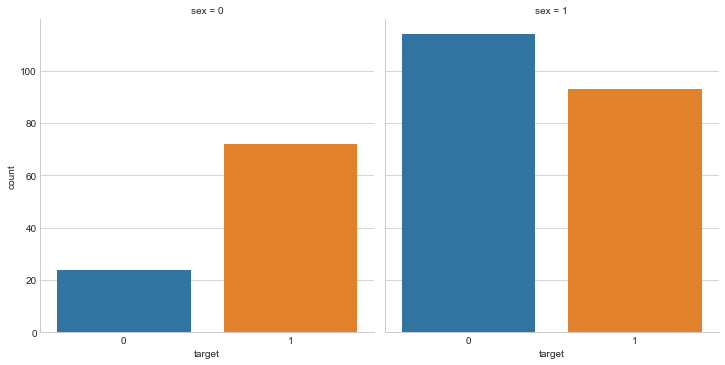

In [16]:
ax = sns.catplot(x="target", col="sex", data=data, kind="count", height=5, aspect=1)

The graph shows that the ratio of heart disease for women is much worse than that for men. <br>
In fact in our data set women are more likely to have the condition than not. 

### 2. Fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

Text(0.5, 1.0, '0 -> fps <120 , 1 -> fps>120')

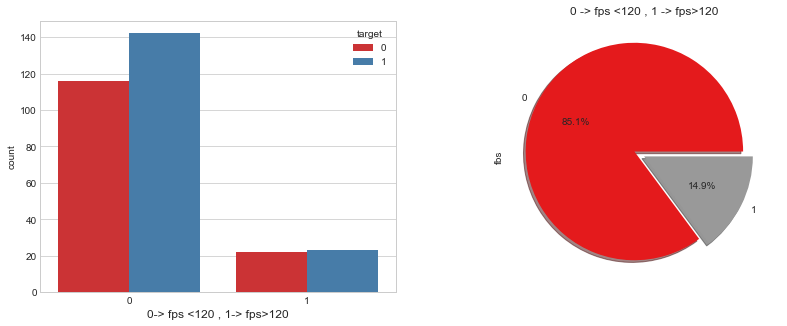

In [17]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='fbs',data=data,hue='target',ax=ax[0],palette="Set1")
ax[0].set_xlabel("0-> fps <120 , 1-> fps>120",size=12)
data.fbs.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap = "Set1" )
ax[1].set_title("0 -> fps <120 , 1 -> fps>120",size=12)

This outcome is not what we would expect People having fps < 120 have more chance of having Heart Disease than people having fps >120 <br>
The data suggests that higher fasted blood sugar reduces the chance of someone having heart disease


### 3. Restecg - resting electrocardiographic results
(The resting electrocardiogram is a test that measures the electrical activity of the heart.)

Text(0.5, 1.0, 'resting electrocardiographic')

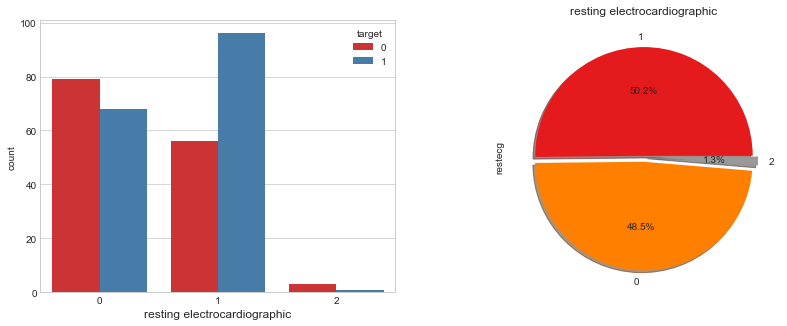

In [18]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='restecg',data=data,hue='target',ax=ax[0],palette="Set1")
ax[0].set_xlabel("resting electrocardiographic",size=12)
data.restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05], cmap = "Set1")
ax[1].set_title("resting electrocardiographic",size=12)

Our graph indicates that a score of 1 in the test is the mostly likely to suffer from heart disease

### 4. Slope - the slope of the peak exercise ST segment

Text(0.5, 1.0, 'peak exercise ST segment ')

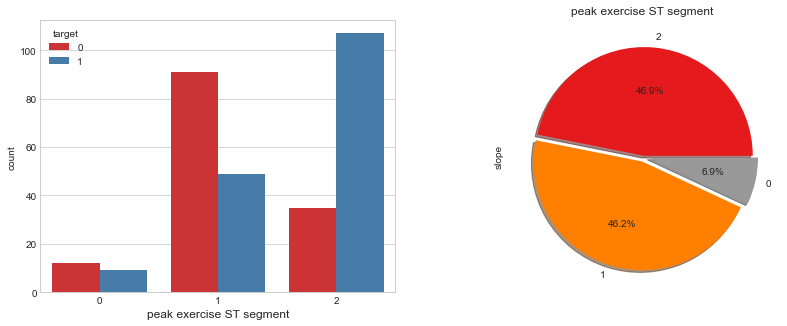

In [19]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='slope',data=data,hue='target',palette="Set1",ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
data.slope.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.005,0.05,0.05], cmap = "Set1")

ax[1].set_title("peak exercise ST segment ",size=12)

Peak slope of 2 has a drastic rate of heart disease

### 5. ca - number of major vessels (0-4) coloured by flourosopy

Text(0.5, 1.0, 'number of major vessels colored by flourosopy')

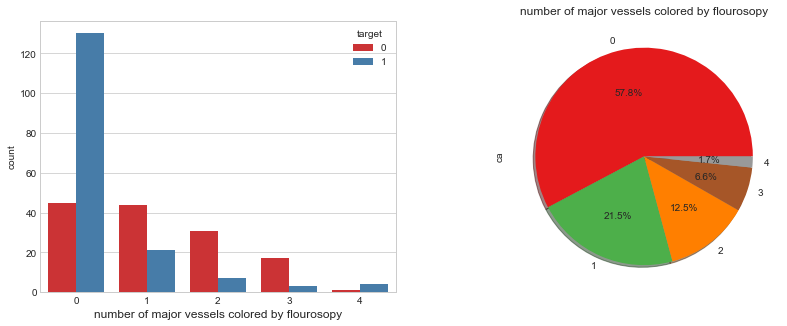

In [20]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='ca',data=data,hue='target',palette="Set1",ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy",size=12)
data.ca.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Set1')
ax[1].set_title("number of major vessels colored by flourosopy",size=12)

### 6. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

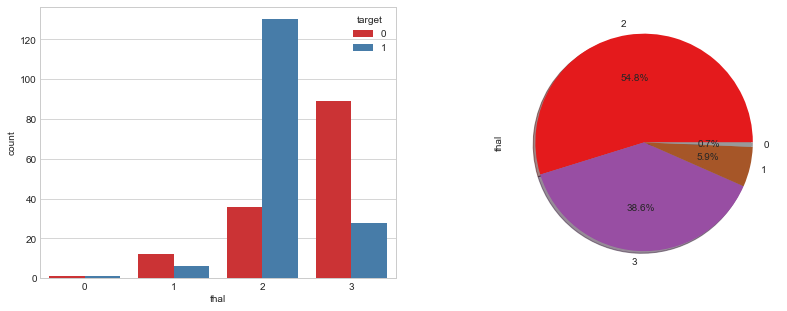

In [21]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='thal',data=data,hue='target',palette="Set1",ax=ax[0])

data.thal.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, cmap = "Set1")


### 7.  Chest Pain 

Text(0.5, 1.0, 'Chest pain')

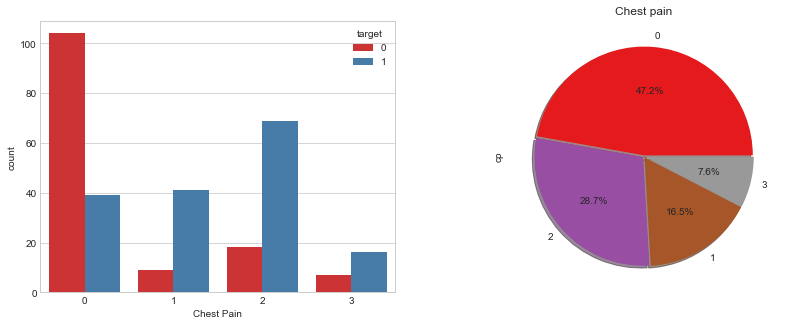

In [22]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='cp',data=data,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Chest Pain")
data.cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01],shadow=True, cmap='Set1')
ax[1].set_title("Chest pain")

Having any level of chest pain seems to be a serious indication of heart disease, as each group that registered any chest pain is more likely to suffer from heart disease than not 

### 8. Exercise induced angina (1 = yes; 0 = no)

Text(0.5, 1.0, ' Exercise induced angina (1 = yes; 0 = no)')

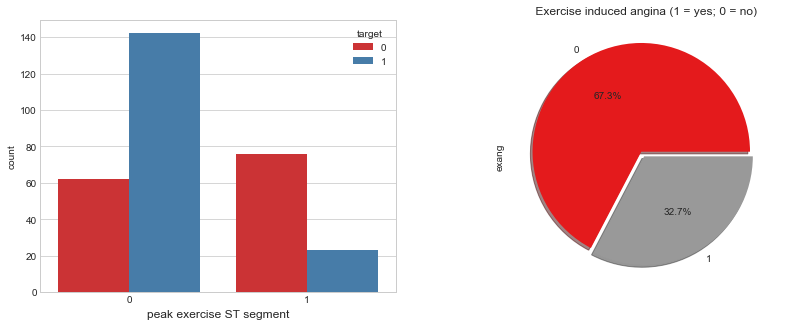

In [23]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='exang',data=data,hue='target',palette="Set1",ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
data.exang.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.05,0], cmap = "Set1")

ax[1].set_title(" Exercise induced angina (1 = yes; 0 = no)",size=12)

In [24]:
exang_and_HD = len(data.loc[(data['exang']==1) & (data['target']== 1)])


exang_and_noHD = len(data.loc[(data['exang']==1) & (data['target']== 0)])
noexang_and_HD = len(data.loc[(data['exang']==0) & (data['target']== 1)])
noexang_and_noHD = len(data.loc[(data['exang']==0) & (data['target']== 0)])
print("have exercise induced angina: "+str(exang_and_noHD+ exang_and_HD))
print("dont have exercise induced angina: "+str(noexang_and_noHD+ noexang_and_HD))
print("exercise induced angina and have heart disease: " + str(exang_and_HD))
print("exercise induced angina and dont have heart disease: " + str(exang_and_noHD))
print("dont have exercise induced angina and have heart disease: " + str(noexang_and_HD))
print("dont have exercise induced angina and dont have  heart disease: " + str(noexang_and_noHD))

have exercise induced angina: 99
dont have exercise induced angina: 204
exercise induced angina and have heart disease: 23
exercise induced angina and dont have heart disease: 76
dont have exercise induced angina and have heart disease: 142
dont have exercise induced angina and dont have  heart disease: 62


99 people in the dataset have exercised induced angina (32.67%) <br>
Of the 99 who have exang 23 also have heart disease (23.23%) <br>
This means that a further 76 who have exang do have heart disease (76.76%) <br>
This indicates that having exang reduces the chance of having heart disease

204 people in the dataset dont have exercised induced angina (67.33%) <br>
Of the 204 who dont have exang 142 have heart disease (69.6%) <br>
This means that a further 62 dont have exang or heart disease (30.4%) <br>
This indicates that not having exang increases the likeilhood of having heart disease

### Takeaways from Catagory Feature Analysis
#### Sex
- Number of Female Patients: 96
- Number of Male Patients: 207
- Percentage of Female Patients: 31.68%
- Percentage of Male Patients: 68.32%
- Number of Female Patients with Heart Disease: 72
- Number of Female Patients without Heart Disease: 24
- Number of Male Patients with Heart Disease: 93
- Number of Male Patients without Heart Disease: 114
- Women are much more likely to suffer from heart than men according to the data 

#### Fbs
- Both groups are more likely to have heart disease than not, however suprisngly People having fps < 120 have more chance of having Heart Disease than people having fps >120 
- The data suggests that higher fasted blood sugar reduces the chance of someone having heart disease

#### Restecg
- Very small sample of restecg type 2
- Type 1 is most likely to suffer from heart disease

#### Slope
- Slope type 2 is most at risk of heart disease
- Slope type 1 indicates a lower chance of heart disease

#### ca
- Having 0 blood vessels coloured by flourosopy are at high risk of heart disease
- 1,2,3 blood vessels are more likely not to have heart disease
- Suprisingly this trend doesnt continue as having 4 vessels coloured by flourosopy increases the risk of heart disease

#### thal
- Tiny sample size of thal 0
- thal 2 at high risk of heart disease
- thal 3 are less likely to suffer from heart disease

#### Chest Pain
- Having any level of chest pain seems to be a serious indication of heart disease, as each group that registered any chest pain is more likely to suffer from heart disease than not

#### Exercise induced angina
- Data seems to indciate that having exang reduces the chance of also having heart disease
- Conversely not having exang increases the chance the patient instead has heart disease



## Exploring continuous features

### 1. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

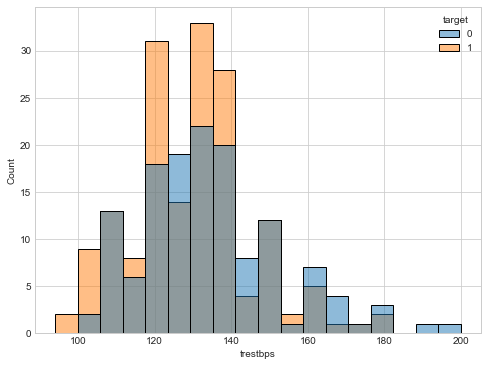

In [25]:
ax = plt.subplots(figsize=(8, 6))
ax = sns.histplot(x="trestbps",hue = "target" ,data=data)
plt.show()

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


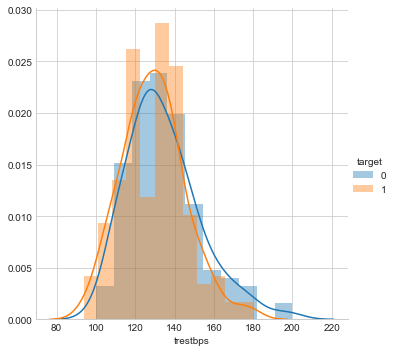

In [26]:
sns.FacetGrid(data,hue="target",height = 5).map(sns.distplot,"trestbps"). add_legend()
plt.show()

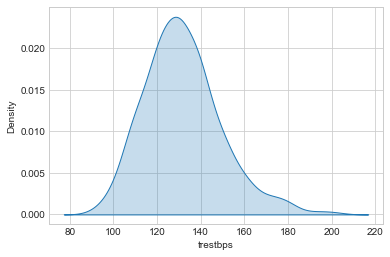

In [27]:
sns.kdeplot(data["trestbps"],shade = True)

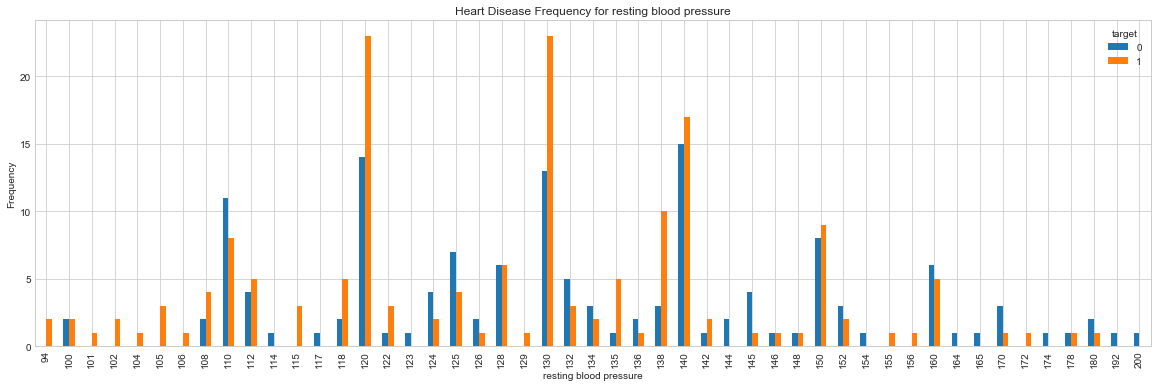

In [28]:
pd.crosstab(data.trestbps,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for resting blood pressure')
plt.xlabel('resting blood pressure')
plt.ylabel('Frequency')

plt.show()

trestbps density is approx normal and the density of both groups are approx normal also in regards to trestbps

### 2. chol - serum cholestoral in mg/d

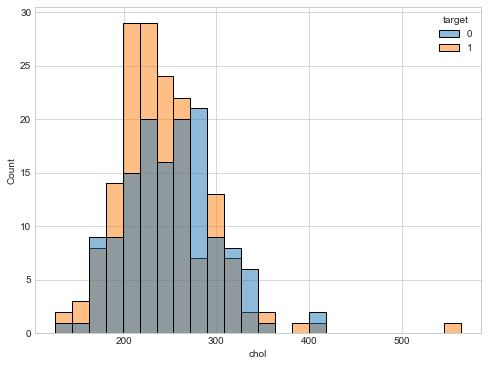

In [29]:
ax = plt.subplots(figsize=(8, 6))
ax = sns.histplot(x="chol",hue = "target" ,data=data)
plt.show()

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


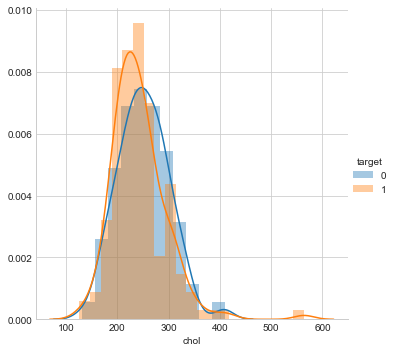

In [30]:
sns.FacetGrid(data,hue="target",height = 5).map(sns.distplot,"chol"). add_legend()
plt.show()

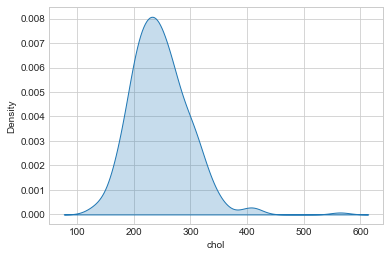

In [31]:
sns.kdeplot(data["chol"],shade = True)

chol density is approx normal and the density of both groups are approx normal also in regards to trestbps

### 3. oldpeak - ST depression induced by exercise relative to rest

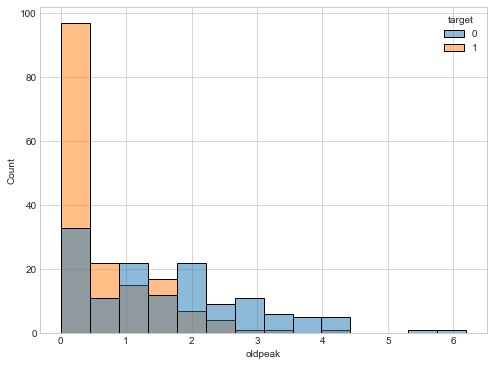

In [32]:
ax = plt.subplots(figsize=(8, 6))
ax = sns.histplot(x="oldpeak",hue = "target" ,data=data)
plt.show()

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


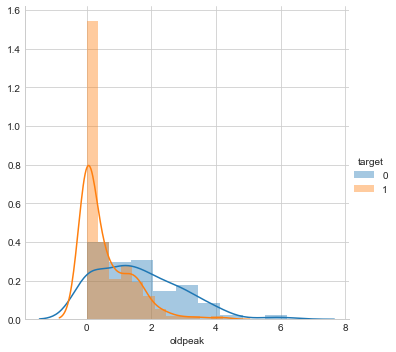

In [33]:
sns.FacetGrid(data,hue="target",height = 5).map(sns.distplot,"oldpeak"). add_legend()
plt.show()

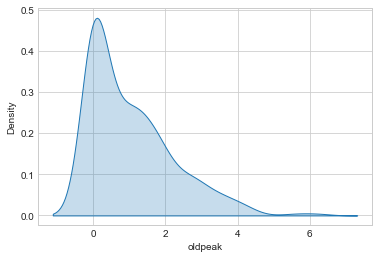

In [34]:
sns.kdeplot(data["oldpeak"],shade = True)

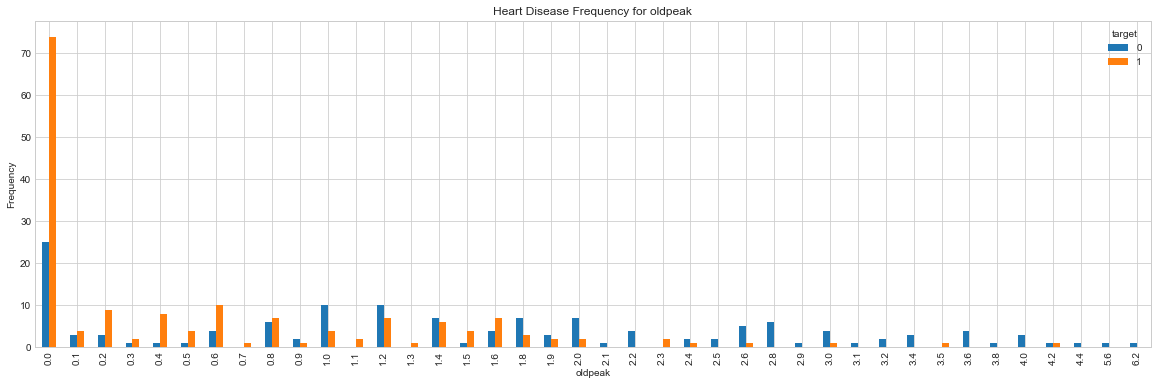

In [35]:
pd.crosstab(data.oldpeak,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for oldpeak')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')

plt.show()

Oldpeak density has a heavy right skew and the frequency of 0.0 compared to the rest of the data might suggest this isnt worth including

### Distribution of each feature

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

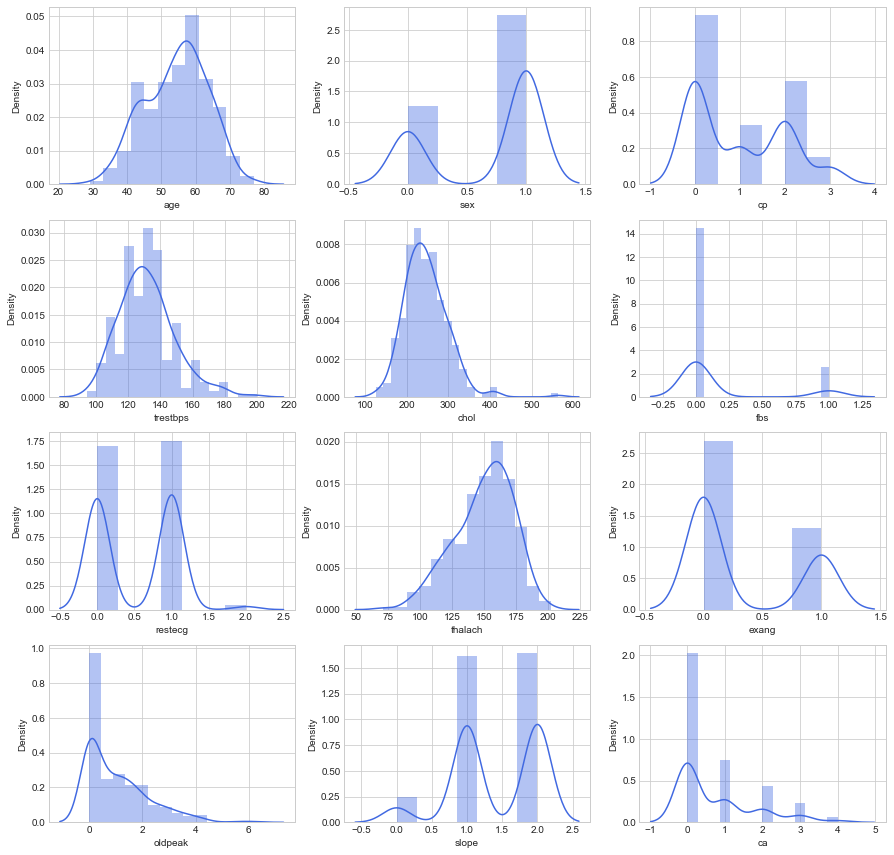

In [36]:
fig,ax=plt.subplots(4,3,figsize=(15,15))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(data.iloc[:,i],kde=True, color='royalblue')

# Bivariate Analysis

### trestbps

Text(0.5, 1.0, 'Trestbps V/S Sex')

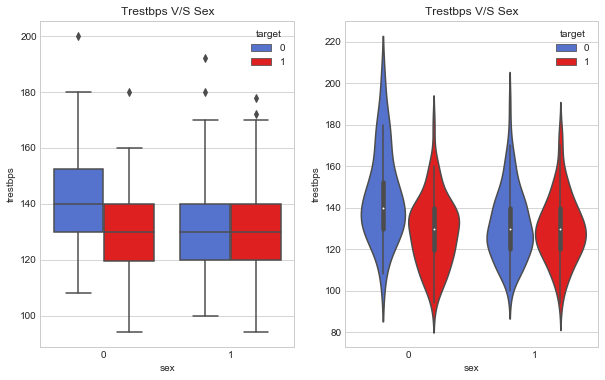

In [37]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.boxplot(y='trestbps',data=data,x='sex',hue='target',palette=["royalblue","red"],ax=ax[0])
ax[0].set_title("Trestbps V/S Sex")

sns.violinplot(y='trestbps',data=data,x='sex',hue='target',ax=ax[1],palette=["royalblue","red"])
ax[1].set_title("Trestbps V/S Sex")

Based on above analysis we can say that Gender plays minor role with respect to Blood Pressure (trestbps).

Text(0.5, 1.0, 'Trestbps V/S Chest Pain')

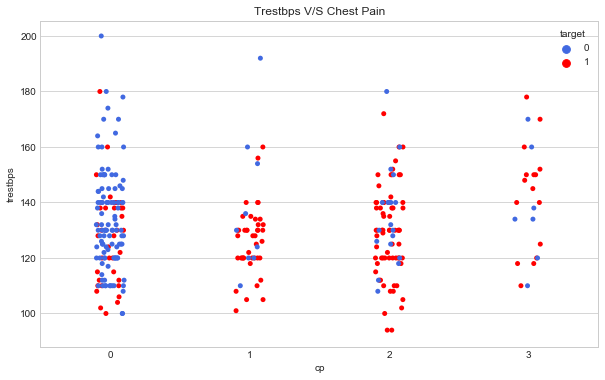

In [38]:
fig,ax=plt.subplots(figsize=(10,6))
sns.stripplot(y='trestbps',data=data,x='cp',hue='target',ax=ax,palette=["royalblue","red"])
ax.set_title("Trestbps V/S Chest Pain")



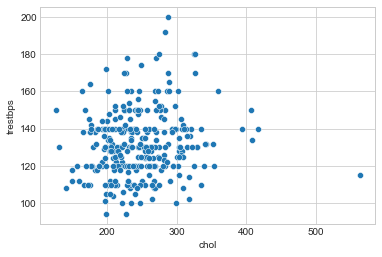

In [39]:
sns.scatterplot(y = "trestbps", x = "chol",data = data) 

Perhaps a week relationship between chol and resting bp <BR>
Also identify an outlier with a value for chol <500

Text(0.5, 1.0, 'Trestbps V/S exang')

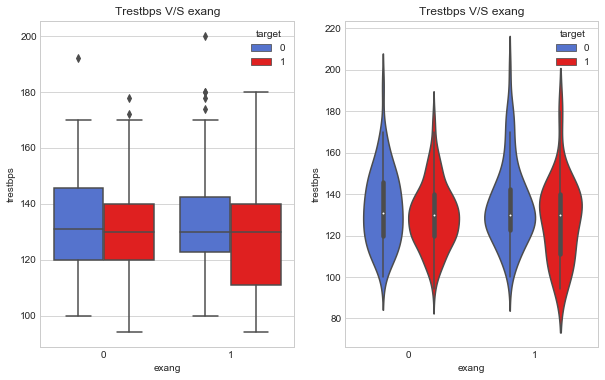

In [40]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.boxplot(y='trestbps',data=data,x='exang',hue='target',palette=["royalblue","red"],ax=ax[0])
ax[0].set_title("Trestbps V/S exang")

sns.violinplot(y='trestbps',data=data,x='exang',hue='target',ax=ax[1],palette=["royalblue","red"])
ax[1].set_title("Trestbps V/S exang")

### chol 

Text(0.5, 1.0, 'Chol V/S Chest Pain')

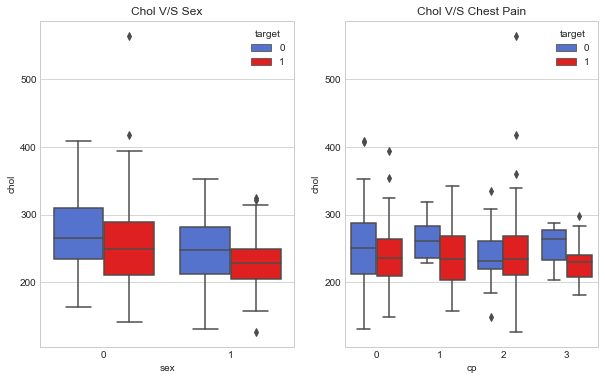

In [41]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.boxplot(y='chol',data=data,x='sex',hue='target',palette=["royalblue","red"],ax=ax[0])
ax[0].set_title("Chol V/S Sex")

sns.boxplot(y='chol',data=data,x='cp',hue='target',ax=ax[1],palette=["royalblue","red"])
ax[1].set_title("Chol V/S Chest Pain")

Women have a higher chol than men <br>
With 2nd Graph (Cholestrol V/S Chest Pain) we can say that if cholestrol is less than 240 approx and Chest pain is at level 3~4 then chances of having heart diseases are higher

### Old peak

Text(0.5, 1.0, 'Old Peak V/S Chest Pain')

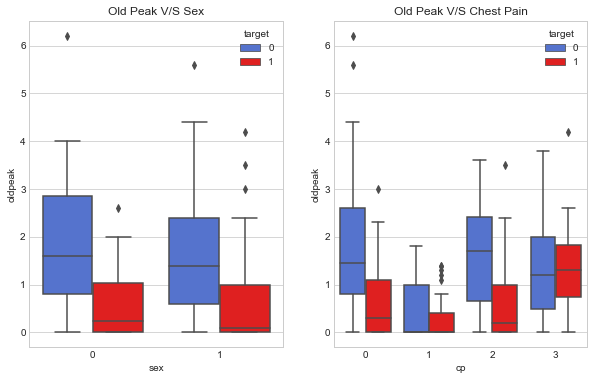

In [42]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.boxplot(y='oldpeak',data=data,x='sex',hue='target',palette=["royalblue","red"],ax=ax[0])
ax[0].set_title("Old Peak V/S Sex")

sns.boxplot(y='oldpeak',data=data,x='cp',hue='target',ax=ax[1],palette=["royalblue","red"])
ax[1].set_title("Old Peak V/S Chest Pain")

Can confidently say that the lower the oldpeak the greater the chance of heart disease

# Feature Engineering, Missing data and Target Tranformation

### Main Tasks
- Imputing missing values by proceeding sequentially through the data

- Transforming some numerical variables that seem really categorical

- Label Encoding some categorical variables that may contain information in their ordering set

- Box Cox Transformation of skewed features (instead of log-transformation)

- Getting dummy variables for categorical features.

### Missing Data

In [43]:
all_data_na = ((len(data)-data.isnull().sum()) / len(data)) * 100

all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

filled_data = pd.DataFrame({'Percent of filled data' :all_data_na})
filled_data.head(20)

,Percent of filled data
target,100.0
thal,100.0
ca,100.0
slope,100.0
oldpeak,100.0
exang,100.0
thalach,100.0
restecg,100.0
fbs,100.0
chol,100.0


Text(0.5, 1.0, 'Percent of filled data by feature')

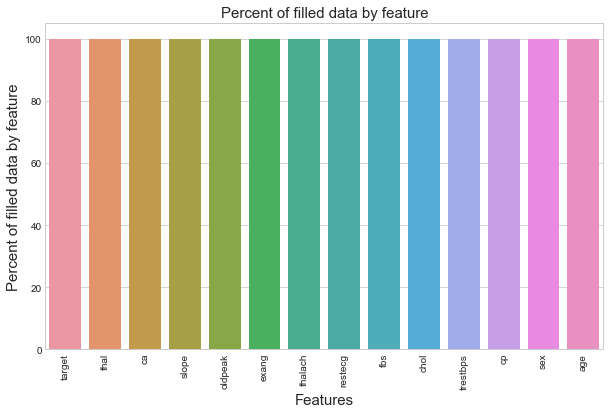

In [44]:
plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of filled data by feature', fontsize=15)
plt.title('Percent of filled data by feature', fontsize=15)

We have no missing values in our dataset so we can proceed

### Dummy Variables
Create dummy variables for the catagorical features

In [45]:

dataset = pd.get_dummies(data,columns =  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
print(dataset.shape)


(303, 31)


### Transforming Skewed Features

In [46]:
# gets numeric features (== gets cat)
numeric_feats = continous_val
# Check the skew of all numerical features
skewed_feats = dataset[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
oldpeak,1.263426
chol,1.137733
trestbps,0.710230
age,-0.201460
thalach,-0.534746


In [47]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = .05
for feat in skewed_features:
    dataset[feat] += 1
    dataset[feat] = boxcox1p(dataset[feat], lam)


There are 5 skewed numerical features to Box Cox transform


In [48]:

# gets numeric features (== gets cat)
numeric_feats = continous_val
# Check the skew of all numerical features
skewed_feats = dataset[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
oldpeak,0.632073
trestbps,0.306838
chol,0.137240
age,-0.546511
thalach,-0.960682


(14.5, -0.5)

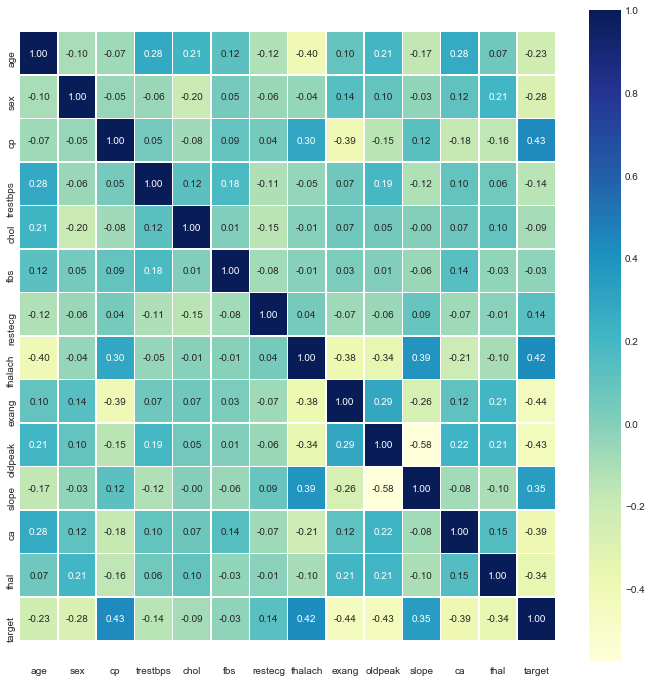

In [49]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

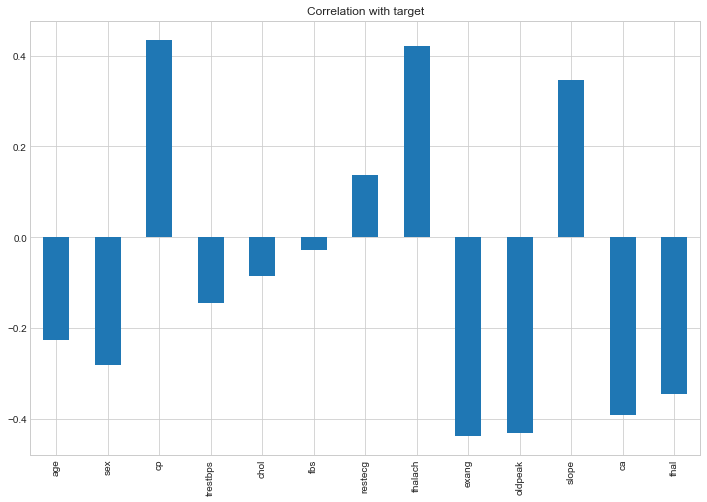

In [50]:
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

cp and thalach have the greatest positive correlation with the target <br>
exang, oldpeak and ca have the greatest negative correlation with the target all less than or close to -0.4

# Model

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Split data into training and test data

In [52]:
from sklearn.model_selection import train_test_split

x = dataset.drop('target', axis=1)
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [110]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_pred_train = lr_clf.predict(x_train)
lr_pred_test = lr_clf.predict(x_test)

#print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
#print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
test_score = accuracy_score(y_test, lr_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(x_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df

## KNeighborsClassifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
knn_pred_train = knn_clf.predict(x_train)
knn_pred_test = knn_clf.predict(x_test)
#print_score(knn_clf, x_train, y_train, x_test, y_test, train=True)
#print_score(knn_clf, x_train, y_train, x_test, y_test, train=False)

In [113]:
test_score = accuracy_score(y_test, knn_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
#results_df

## C-Support Vector Classification.

In [126]:
from sklearn.svm import SVC


svc_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svc_clf.fit(x_train, y_train)
svc_pred_train = svm_clf.predict(x_train)
svc_pred_test = svm_clf.predict(x_test)
#print_score(svm_clf, x_train, y_train, x_test, y_test, train=True)
#print_score(svm_clf, x_train, y_train, x_test, y_test, train=False)

In [127]:
test_score = accuracy_score(y_test, svc_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, svc_clf.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
#results_df

## DecisionTreeClassifier

In [116]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
tree_pred_train = tree_clf.predict(x_train)
tree_pred_test = tree_clf.predict(x_test)
#print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
#print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

In [117]:
test_score = accuracy_score(y_test, tree_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
#results_df

## RandomForestClassifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(x_train, y_train)
rf_pred_train = rf_clf.predict(x_train)
rf_pred_test = rf_clf.predict(x_test)
#print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
#print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

In [119]:
test_score = accuracy_score(y_test, rf_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
#results_df

## XGBClassifier

In [120]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)
xgb_pred_train = xgb_clf.predict(x_train)
xgb_pred_test = xgb_clf.predict(x_test)

#print_score(xgb_clf, x_train, y_train, x_test, y_test, train=True)
#print_score(xgb_clf, x_train, y_train, x_test, y_test, train=False)

[19:09:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\johnl\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [121]:
test_score = accuracy_score(y_test, xgb_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
#results_df

## LGBMClassifier

In [122]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier()

lgbm_clf.fit(x_train, y_train)
lgbm_pred_train = lgbm_clf.predict(x_train)
lgbm_pred_test = lgbm_clf.predict(x_test)

#print_score(lgbm_clf, x_train, y_train, x_test, y_test, train=True)
#print_score(lgbm_clf, x_train, y_train, x_test, y_test, train=False)

In [123]:
test_score = accuracy_score(y_test, lgbm_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, lgbm_clf.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Lightgbm Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
#results_df

## Confusion Matrix

### Top Left 
True Positive:
- Interpretation: Predicted positive and it’s true.
- Predicted that someone has heart disease and they do

### Top Right
False Positive: (Type 1 Error)
- Interpretation: Predicted positive and it’s false.
- Predicted that someone has heart disease and they dont


### Bottom Left 
False Negative: (Type 2 Error)
- Interpretation: Predicted negative and it’s false.
- Predicted that someone doesnt have heart disease and they do

### Bottom Right 
True Negative:
- Interpretation: Predicted negative and it’s true.
- Predicted that someone doesnt have  heart disease and they dont



In [128]:
from sklearn.metrics import confusion_matrix

cm_lr_train = confusion_matrix(y_train,lr_pred_train)
cm_knn_train= confusion_matrix(y_train,knn_pred_train)
cm_svc_train = confusion_matrix(y_train,svc_pred_train)
cm_tree_train = confusion_matrix(y_train,tree_pred_train)
cm_rf_train = confusion_matrix(y_train,rf_pred_train)
cm_xgb_train = confusion_matrix(y_train,xgb_pred_train)
cm_lgbm_train = confusion_matrix(y_train,lgbm_pred_train)

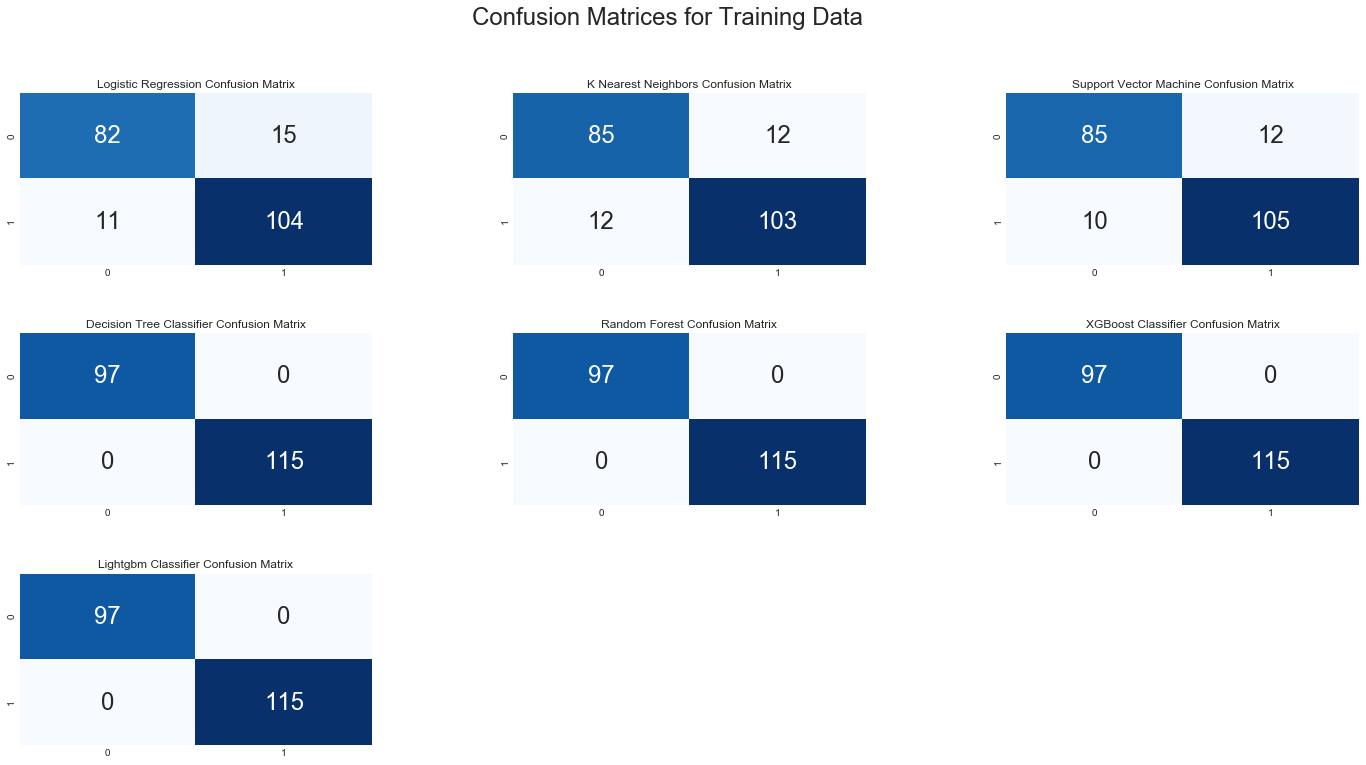

In [129]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices for Training Data",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr_train,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn_train,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm_train,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(3,3,4)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_tree_train,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf_train,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("XGBoost Classifier Confusion Matrix")
sns.heatmap(cm_xgb_train,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Lightgbm Classifier Confusion Matrix")
sns.heatmap(cm_lgbm_train,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()

In [130]:
from sklearn.metrics import confusion_matrix

cm_lr_test = confusion_matrix(y_test,lr_pred_test)
cm_knn_test= confusion_matrix(y_test,knn_pred_test)
cm_svc_test = confusion_matrix(y_test,svc_pred_test)
cm_tree_test = confusion_matrix(y_test,tree_pred_test)
cm_rf_test = confusion_matrix(y_test,rf_pred_test)
cm_xgb_test = confusion_matrix(y_test,xgb_pred_test)
cm_lgbm_test = confusion_matrix(y_test,lgbm_pred_test)

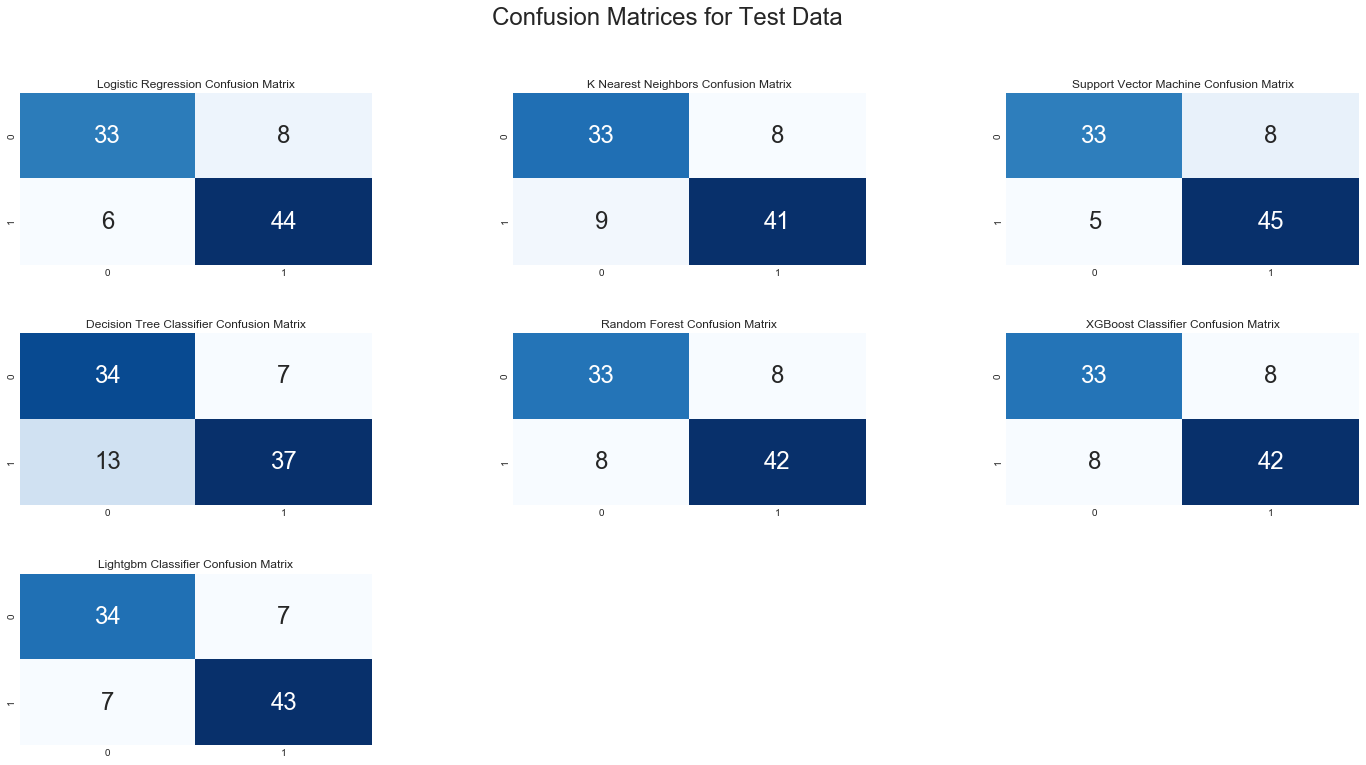

In [105]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices for Test Data",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr_test,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn_test,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm_test,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(3,3,4)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_tree_test,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf_test,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("XGBoost Classifier Confusion Matrix")
sns.heatmap(cm_xgb_test,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Lightgbm Classifier Confusion Matrix")
sns.heatmap(cm_lgbm_test,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()

# Results

In [124]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.735849,84.615385
1,K-nearest neighbors,88.679245,81.318681
2,Support Vector Machine,89.622642,85.714286
3,Decision Tree Classifier,100.000000,78.021978
4,Random Forest Classifier,100.000000,82.417582
5,XGBoost Classifier,100.000000,82.417582
6,Lightgbm Classifier,100.000000,84.615385
